# Text Embeddings

Embeddings are nmerical representations of text in form of vectors that capture the semantic meaning of paragraphs through their position in a high dimensional vector space. 

In [11]:
from sentence_transformers import SentenceTransformer
#sentence-transformers/all-MiniLM-l6-v2
embedding_model = SentenceTransformer("all-MiniLM-l6-v2")

d:\NLP_Project\Gen_AI\venv\lib\site-packages\huggingface_hub\file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


In [12]:
embedding_model

SentenceTransformer(
  (0): Transformer({'max_seq_length': 256, 'do_lower_case': False}) with Transformer model: BertModel 
  (1): Pooling({'word_embedding_dimension': 384, 'pooling_mode_cls_token': False, 'pooling_mode_mean_tokens': True, 'pooling_mode_max_tokens': False, 'pooling_mode_mean_sqrt_len_tokens': False, 'pooling_mode_weightedmean_tokens': False, 'pooling_mode_lasttoken': False, 'include_prompt': True})
  (2): Normalize()
)

In [13]:
S1= 'children plying cricket.'
S2 ='i am python developer.'
S3 = 'kids loves cricket'
S4= 'coding is best practises for developing softwares'
ST= [S1,S2,S3,S4]
emb =embedding_model.encode(ST)
emb.shape

(4, 384)

In [14]:
emb0 = emb[0]
emb1 = emb[1]
emb2 = emb[2]
emb3 = emb[3]

emb1.shape,emb2.shape

((384,), (384,))

In [15]:
emb1[:10]

array([-0.03873728, -0.00241375, -0.05249071,  0.0093185 ,  0.00616037,
       -0.16278592,  0.01308683,  0.10553778, -0.0325528 , -0.01356547],
      dtype=float32)

In [16]:
print(embedding_model.similarity_pairwise([emb0],[emb1]))
print(embedding_model.similarity_pairwise([emb1],[emb2]))
print(embedding_model.similarity_pairwise([emb2],[emb3]))
print(embedding_model.similarity_pairwise([emb1],[emb3]))

tensor([0.0656])
tensor([0.0401])
tensor([0.0834])
tensor([0.4178])


d:\NLP_Project\Gen_AI\venv\lib\site-packages\sentence_transformers\util.py:33: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at ..\torch\csrc\utils\tensor_new.cpp:277.)
  a = torch.tensor(a)


In [17]:
from sklearn.metrics.pairwise import cosine_similarity

In [18]:
print(cosine_similarity([emb0],[emb2]))
print(cosine_similarity([emb1],[emb3]))
print(cosine_similarity([emb0],[emb1]))

[[0.8301606]]
[[0.41776273]]
[[0.06564648]]


# Text Embedding Applications

1. Semantic Search
2. Clustering
3. Anomaly/ Outlier detection
4. Classification

##  Semantic Search

In [1]:
import pandas as pd

df = pd.read_csv(
    "https://raw.githubusercontent.com/mistralai/cookbook/main/data/Symptom2Disease.csv",
    index_col=0,
)

In [2]:
df.head()

,label,text
0,Psoriasis,I have been experiencing a skin rash on my arm...
1,Psoriasis,"My skin has been peeling, especially on my kne..."
2,Psoriasis,I have been experiencing joint pain in my fing...
3,Psoriasis,"There is a silver like dusting on my skin, esp..."
4,Psoriasis,"My nails have small dents or pits in them, and..."


In [3]:
df.isnull().sum()

label    0
text     0
dtype: int64

In [4]:
df.isna().sum()

label    0
text     0
dtype: int64

In [5]:
df.shape

(1200, 2)

In [6]:

from sentence_transformers import SentenceTransformer
#sentence-transformers/all-MiniLM-l6-v2
embedding_model = SentenceTransformer("all-MiniLM-l6-v2")

d:\NLP_Project\Gen_AI\venv\lib\site-packages\sentence_transformers\cross_encoder\CrossEncoder.py:11: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from tqdm.autonotebook import tqdm, trange
d:\NLP_Project\Gen_AI\venv\lib\site-packages\huggingface_hub\file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


In [7]:
data =df["text"].tolist()
embedding_col = [embedding_model.encode(c) for c in data]

In [8]:
df["embeddings"] = embedding_col
df.head()

,label,text,embeddings
0,Psoriasis,I have been experiencing a skin rash on my arm...,"[-0.005999902, 0.0015637461, 0.035528798, 0.00..."
1,Psoriasis,"My skin has been peeling, especially on my kne...","[-0.034788303, -0.057306778, 0.05410174, 0.062..."
2,Psoriasis,I have been experiencing joint pain in my fing...,"[-0.02795374, -0.13009979, 0.017556755, 0.0645..."
3,Psoriasis,"There is a silver like dusting on my skin, esp...","[-0.045886885, -0.011741287, 0.08693738, 0.067..."
4,Psoriasis,"My nails have small dents or pits in them, and...","[-0.03344016, -0.027537538, 0.018506862, 0.020..."


In [10]:
df.shape

(1200, 3)

In [19]:
import numpy as np

from sklearn.metrics.pairwise import cosine_similarity
from sklearn.metrics import pairwise_distances_argmin as distances_argmin

In [22]:
query = ["I am feeling very sick and low"]
emb_query = embedding_model.encode(query)
cosine_simariry = cosine_similarity(emb_query,list(embedding_col))
cosine_simariry


array([[0.15303099, 0.15506993, 0.22277862, ..., 0.22985367, 0.40119496,
        0.29635257]], dtype=float32)

In [23]:
cosine_simariry.shape

(1, 1200)

In [24]:
index_doc_cosine = np.argmax(cosine_simariry)
index_doc_cosine

159

In [25]:
df.label[index_doc_cosine]

159              Chicken pox
159    Dimorphic Hemorrhoids
159     Cervical spondylosis
159            drug reaction
Name: label, dtype: object

In [26]:
list(df.text[index_doc_cosine])

["I have no energy and have lost my appetite. I'm feeling really sick and don't know what's wrong.",
 "I've been terribly constipated lately, and when I do go to the bathroom, it hurts a lot. Aside from that, my anus has been really itchy, and I've observed some blood in my stool.",
 'I have been experiencing intense back pain, a dry cough, and a lack of strength in my limbs. My neck hurts and I have been feeling dizzy and unsteady on my feet.',
 'I have experinenced significant weight gain and become very obese. I have changes in my appetite and cravings for different foods']

## Clustering

In [27]:
from sklearn.cluster import KMeans

model = KMeans(n_clusters=24, max_iter=1000)
model.fit(df['embeddings'].to_list())
df["cluster"] = model.labels_
print(*df[df.cluster==23].text.head(3), sep='\n\n')

I have been experiencing a lot of bloating and constipation, and it's been really uncomfortable. It feels like there's a lot of pressure and pain in my belly area.

I've been feeling exhausted and weak, and I can't seem to get rid of it. Because of the vomiting and nausea, I've entirely lost my appetite. My belly pains which are causing me concern.

I am experiencing a lot of nausea and vomiting, and it's been quite difficult for me to eat anything. I've entirely lost my appetite, and as a result, I have become quite weak.


In [28]:
df.head()

,label,text,embeddings,cluster
0,Psoriasis,I have been experiencing a skin rash on my arm...,"[-0.005999902, 0.0015637461, 0.035528798, 0.00...",13
1,Psoriasis,"My skin has been peeling, especially on my kne...","[-0.034788303, -0.057306778, 0.05410174, 0.062...",3
2,Psoriasis,I have been experiencing joint pain in my fing...,"[-0.02795374, -0.13009979, 0.017556755, 0.0645...",3
3,Psoriasis,"There is a silver like dusting on my skin, esp...","[-0.045886885, -0.011741287, 0.08693738, 0.067...",3
4,Psoriasis,"My nails have small dents or pits in them, and...","[-0.03344016, -0.027537538, 0.018506862, 0.020...",3


In [29]:
df['cluster'].unique()

array([13,  3, 17, 22, 19, 15, 11,  2,  1, 23, 18, 16,  4, 14,  7,  5,  9,
       20, 21, 12,  0,  8, 10,  6])

In [30]:
df['cluster'].value_counts()

cluster
2     85
7     81
21    78
20    66
6     61
10    61
18    59
13    52
14    51
5     51
4     51
11    50
12    50
8     50
23    47
22    46
17    46
3     42
0     40
16    33
9     31
19    31
1     22
15    16
Name: count, dtype: int64

### Visalization

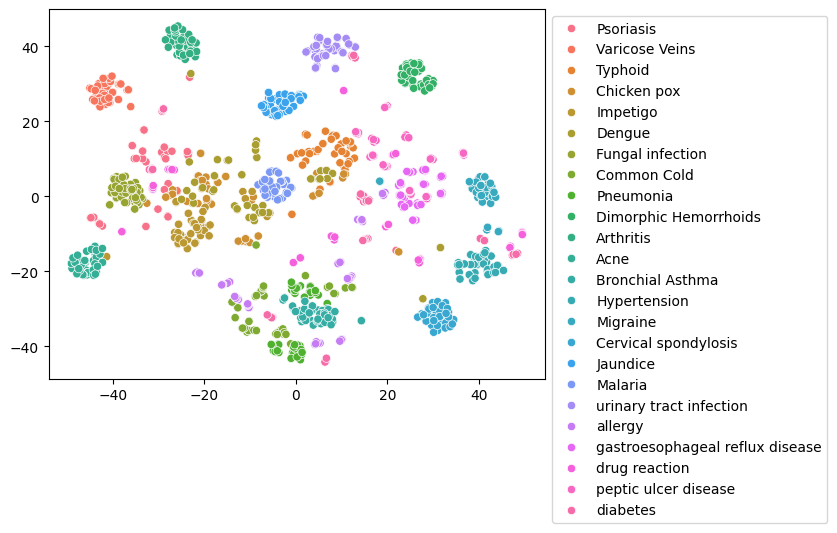

In [31]:
import seaborn as sns
from sklearn.manifold import TSNE
import numpy as np

tsne = TSNE(n_components=2, random_state=0).fit_transform(np.array(df['embeddings'].to_list()))
ax = sns.scatterplot(x=tsne[:, 0], y=tsne[:, 1], hue=np.array(df['label'].to_list()))
sns.move_legend(ax, 'upper left', bbox_to_anchor=(1, 1))

## Anomaly Detection / Outllier Detection

- We can add an anomalous piece of text and check if the outlier (anomaly) detection algorithm (Isolation Forest) can identify it as an outlier (anomaly), based on its embedding.


In [32]:
from sklearn.ensemble import IsolationForest

In [34]:
input_text = """I am software developer developing AI applications. I have 5 years plus experince in software developments and right now i am working as freelancer"""
emb = embedding_model.encode([input_text])
type(emb)

numpy.ndarray

In [35]:
emb_a=emb.tolist()[0]
embedding_col_new = embedding_col.copy()
embedding_col_new.append(emb_a)
emb_arr=np.array(embedding_col_new)
print("Shape: " + str(emb_arr.shape))
print(emb_arr)

Shape: (1201, 384)
[[-0.0059999   0.00156375  0.0355288  ... -0.1177751  -0.02590785
   0.08773926]
 [-0.0347883  -0.05730678  0.05410174 ... -0.07246443 -0.0311397
   0.09981549]
 [-0.02795374 -0.13009979  0.01755675 ... -0.02442191 -0.00058679
   0.02199244]
 ...
 [ 0.03987182 -0.06552272  0.04915278 ... -0.03280788 -0.11041481
  -0.00819691]
 [ 0.07113416 -0.07929048  0.03728094 ... -0.0455579  -0.0673093
   0.00618431]
 [-0.03741776 -0.06281339  0.0378049  ... -0.01323083 -0.01908223
  -0.01830462]]


In [38]:
df_copy= pd.read_csv(
    "https://raw.githubusercontent.com/mistralai/cookbook/main/data/Symptom2Disease.csv",
    index_col=0,
)
df_copy.shape

(1200, 2)

In [39]:
df_copy.head()

,label,text
0,Psoriasis,I have been experiencing a skin rash on my arm...
1,Psoriasis,"My skin has been peeling, especially on my kne..."
2,Psoriasis,I have been experiencing joint pain in my fing...
3,Psoriasis,"There is a silver like dusting on my skin, esp..."
4,Psoriasis,"My nails have small dents or pits in them, and..."


In [40]:
new = {'label': "Software_Developer", 'text': input_text}
df_copy.loc[len(df_copy)] = new
df_copy.tail()

,label,text
296,diabetes,"Particularly in the crevices of my skin, I hav..."
297,diabetes,I regularly experience these intense urges and...
298,diabetes,"I have trouble breathing, especially outside. ..."
299,diabetes,I constantly sneeze and have a dry cough. My i...
1200,Software_Developer,I am software developer developing AI applicat...


In [41]:
df_copy.shape

(1201, 2)

#### Use Isolation Forest to identify potential outliers

- `IsolationForest` classifier will predict `-1` for potential outliers, and `1` for non-outliers.
- You can inspect the rows that were predicted to be potential outliers and verify that the question about baking is predicted to be an outlier.

In [42]:
clf = IsolationForest() 
preds = clf.fit_predict(emb_arr)

print(f"{len(preds)} predictions. Set of possible values: {set(preds)}")

1201 predictions. Set of possible values: {1, -1}


In [43]:
df_copy.loc[preds == -1]

,label,text
226,peptic ulcer disease,Bending down or reclining down only makes my s...
1200,Software_Developer,I am software developer developing AI applicat...


# Classification

In [44]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [45]:
df.head()

,label,text,embeddings,cluster
0,Psoriasis,I have been experiencing a skin rash on my arm...,"[-0.005999902, 0.0015637461, 0.035528798, 0.00...",13
1,Psoriasis,"My skin has been peeling, especially on my kne...","[-0.034788303, -0.057306778, 0.05410174, 0.062...",3
2,Psoriasis,I have been experiencing joint pain in my fing...,"[-0.02795374, -0.13009979, 0.017556755, 0.0645...",3
3,Psoriasis,"There is a silver like dusting on my skin, esp...","[-0.045886885, -0.011741287, 0.08693738, 0.067...",3
4,Psoriasis,"My nails have small dents or pits in them, and...","[-0.03344016, -0.027537538, 0.018506862, 0.020...",3


In [46]:
X= df['embeddings']
y= df['label']

In [48]:
X.shape, y.shape

((1200,), (1200,))

In [49]:
# Create a train / test split
train_x, test_x, train_y, test_y = train_test_split(
    X, y, test_size=0.2
)


# Normalize features
scaler = StandardScaler()
train_x = scaler.fit_transform(train_x.to_list())
test_x = scaler.transform(test_x.to_list())


In [50]:
# Train a classifier and compute the test accuracy
# For a real problem, C should be properly cross validated and the confusion matrix analyzed
clf = LogisticRegression(random_state=0, C=1.0, max_iter=500).fit(
    train_x, train_y.to_list()
)
# you can also try the sag algorithm:
# clf = LogisticRegression(random_state=0, C=1.0, max_iter=1000, solver='sag').fit(train_x, train_y)

print(f"Precision: {100*np.mean(clf.predict(test_x) == test_y.to_list()):.2f}%")

Precision: 96.67%


In [60]:
text = ["I've been experiencing frequent headaches and vision problems."]

print(clf.predict(embedding_model.encode(text)))


['Dengue']


In [56]:
clf1 = RandomForestClassifier(n_estimators=200)
clf1.fit(train_x, train_y)

RandomForestClassifier(n_estimators=200)

In [57]:
y_pred = clf1.predict(test_x)

In [58]:
accuracy = accuracy_score(test_y, y_pred) # compute accuracy
print("Accuracy:", accuracy)

Accuracy: 0.95


In [59]:
text = ["I've been experiencing frequent headaches and vision problems."]

print(clf1.predict(embedding_model.encode(text)))


['Dengue']
